# House Price Prediction — Final Notebook

This notebook demonstrates a clean machine learning workflow:
- Baseline model
- Controlled feature-engineering experiments
- Model comparison
- Final model selection

In [46]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score , mean_squared_error

import joblib
import os

In [47]:
df = pd.read_csv("/Users/ragibwaquar/Documents/house-price-prediction/data/housing.csv")

print("Data shape")
df

Data shape


,area,bedrooms,age,price
0,800,1,20,30
1,900,2,15,38
2,1000,2,12,45
3,1100,2,10,50
4,1200,2,8,58
5,1300,3,7,65
6,1400,3,6,72
7,1500,3,5,80
8,1600,3,4,90
9,1700,3,4,100


## Experiment 1 — Baseline Model

**Features used:** area, bedrooms, age  
**Model:** Linear Regression  
**Purpose:** Establish a baseline performance for comparison.

In [48]:
df = pd.read_csv("/Users/ragibwaquar/Documents/house-price-prediction/data/housing.csv")
df

,area,bedrooms,age,price
0,800,1,20,30
1,900,2,15,38
2,1000,2,12,45
3,1100,2,10,50
4,1200,2,8,58
5,1300,3,7,65
6,1400,3,6,72
7,1500,3,5,80
8,1600,3,4,90
9,1700,3,4,100


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      15 non-null     int64
 1   bedrooms  15 non-null     int64
 2   age       15 non-null     int64
 3   price     15 non-null     int64
dtypes: int64(4)
memory usage: 612.0 bytes


In [50]:
df.describe()

,area,bedrooms,age,price
count,15.000000,15.000000,15.000000,15.000000
mean,1566.666667,2.933333,6.800000,92.533333
std,549.891764,1.032796,5.401058,50.182334
min,800.000000,1.000000,1.000000,30.000000
25%,1150.000000,2.000000,3.000000,54.000000
50%,1500.000000,3.000000,5.000000,80.000000
75%,1900.000000,3.500000,9.000000,122.500000
max,2600.000000,5.000000,20.000000,195.000000


In [51]:
X = df[['area' , 'bedrooms' , 'age']]
y = df['price']
print(X.head())
print(y.head())

   area  bedrooms  age
0   800         1   20
1   900         2   15
2  1000         2   12
3  1100         2   10
4  1200         2    8
0    30
1    38
2    45
3    50
4    58
Name: price, dtype: int64


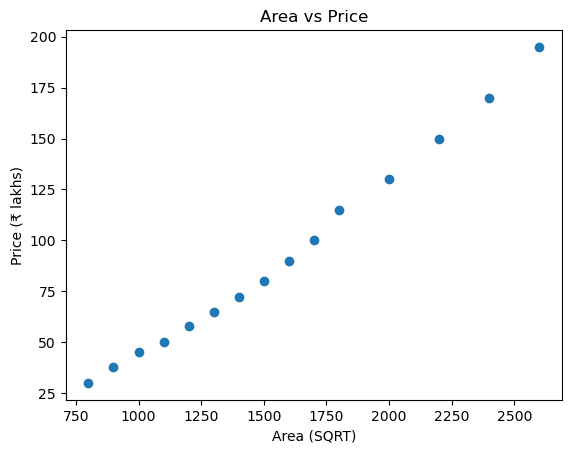

In [52]:
plt.scatter(df['area'] , df['price'])
plt.xlabel("Area (SQRT)")
plt.ylabel("Price (₹ lakhs)")
plt.title("Area vs Price")
plt.show()


In [53]:

X_train , X_test , y_train , y_test = train_test_split(
    X,y, test_size = 0.2 , random_state = 42
)

In [54]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:

model = LinearRegression()
model.fit(X_train_scaled , y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test_scaled)

In [57]:

mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test,y_pred)
print("linear mse , " , mse)
print("linear r2 , " , r2)

linear mse ,  34.62556335493938
linear r2 ,  0.980276577835794


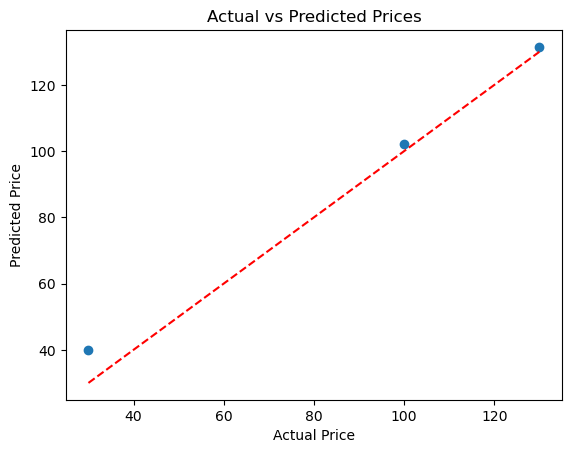

In [58]:
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)],
         linestyle='--', color = "red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [59]:

ridge_model= Ridge(alpha = 1.0)
ridge_model.fit(X_train_scaled , y_train)

print("Ridge model trained")

Ridge model trained


In [60]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [61]:

mse = mean_squared_error(y_test , y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)
print("Ridge MSE , " , mse)
print("Ridge R2 , " , r2_ridge)


Ridge MSE ,  164.03892686672177
Ridge R2 ,  0.9065601049493357


In [62]:
new_house = [[2000,3,5]]
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print("Predicted Price (₹ lakhs):", predicted_price[0])

Predicted Price (₹ lakhs): 137.26885678566464


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
predicted_price_ridge = ridge_model.predict(new_house_scaled)
print("Predicted Price with Ridge (₹ lakhs):", predicted_price_ridge[0])

Predicted Price with Ridge (₹ lakhs): 119.1203731246228


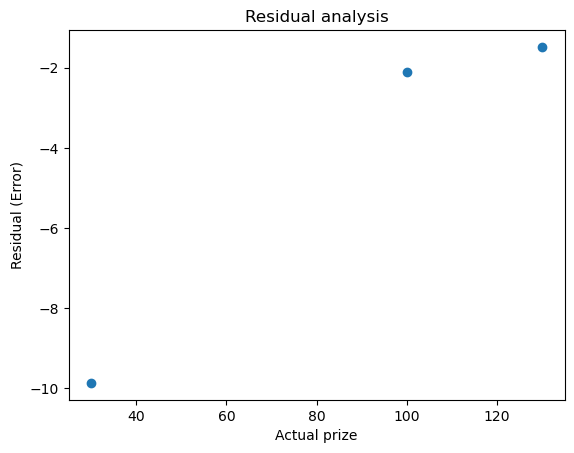

In [64]:
residuals = y_test - y_pred
plt.scatter(y_test , residuals)
plt.xlabel("Actual prize")
plt.ylabel("Residual (Error)")
plt.title("Residual analysis")
plt.show()

## Experiment 2 — Feature Engineering: area_per_bedroom

**New feature:** area_per_bedroom = area / bedrooms  
**Model:** Linear Regression  
**Purpose:** Test whether space efficiency improves prediction over the baseline.

In [65]:
df['area_per_bedroom'] = df['area']/df['bedrooms']
df[['area' , 'bedrooms' , 'area_per_bedroom']].head()


,area,bedrooms,area_per_bedroom
0,800,1,800.0
1,900,2,450.0
2,1000,2,500.0
3,1100,2,550.0
4,1200,2,600.0


In [66]:
#Experiment 1 features
X_v1 = df[['area' , 'bedrooms' , 'age']]

#Experiment 2 features
X_v2 = df[['area' , 'bedrooms' , 'age' , 'area_per_bedroom']]

y = df['price']

In [67]:

X_train_v1 , X_test_v1 , y_train , y_test = train_test_split(
    X_v1, y, test_size = 0.2 , random_state  = 42
)
X_train_v2 , X_test_v2 , y_train_v2, y_test_v2 = train_test_split(
    X_v2 , y , test_size = 0.2 , random_state = 42
)

In [68]:


scaler_v1 = StandardScaler()
X_train_v1_scaled = scaler_v1.fit_transform(X_train_v1)
X_test_v1_scaled = scaler_v1.fit_transform(X_test_v1)

scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train_v2)
X_test_v2_scaled = scaler_v2.fit_transform(X_test_v2)

In [69]:


model_v1 = LinearRegression()
model_v2 = LinearRegression()

model_v1.fit(X_train_v1_scaled , y_train)
model_v2.fit(X_train_v2_scaled , y_train)

LinearRegression()

In [70]:


r2_v1 = r2_score(y_test , model_v1.predict(X_test_v1_scaled))
r2_v2 = r2_score(y_test , model_v2.predict(X_test_v2_scaled))

print("Experiment 1 (base features) R2: " , r2_v1)
print("Experiment 2 (+ area_per_bedroom) R2: " , r2_v2)

Experiment 1 (base features) R2:  0.9406427731399971
Experiment 2 (+ area_per_bedroom) R2:  0.9678708458744244


## Experiment 3 — Feature Engineering: log_area

**New feature:** log_area = log(area)  
**Model:** Linear Regression  
**Purpose:** Capture diminishing returns of house size and test generalization improvement.

In [71]:
df['log_area'] = np.log(df['area'])
df[['area' , 'log_area']].head()

,area,log_area
0,800,6.684612
1,900,6.802395
2,1000,6.907755
3,1100,7.003065
4,1200,7.090077


In [72]:
#Baseline Experiment 1
X_v1 = df[['area' , 'bedrooms' , 'age']]

#Experiment 2 
X_v2 = df[['area' , 'bedrooms'  , 'age' , 'area_per_bedroom']]

#Experiment 3
X_v3 = df[['area' , 'bedrooms' , 'age' , 'log_area' ]]

y = df['price']


In [73]:

df_train , df_test = train_test_split(df,test_size= 0.2 , random_state = 42)

X_train_v1 , X_test_v2 = df_train[X_v1.columns] , df_test[X_v1.columns]
X_train_v2 , X_test_v2 = df_train[X_v2.columns] , df_test[X_v2.columns]
X_train_v3 , X_test_v3 = df_train[X_v3.columns] , df_test[X_v3.columns]

y_train = df_train['price']
y_test = df_test['price']

In [74]:

scaler_v1 = StandardScaler()
scaler_v2 = StandardScaler()
scaler_v3 = StandardScaler()

X_train_v1_s = scaler_v1.fit_transform(X_train_v1)
X_test_v1_s = scaler_v1.fit_transform(X_test_v1)

X_train_v2_s = scaler_v2.fit_transform(X_train_v2)
X_test_v2_s = scaler_v2.fit_transform(X_test_v2)

X_train_v3_s = scaler_v3.fit_transform(X_train_v3)
X_test_v3_s = scaler_v3.fit_transform(X_test_v3)



In [75]:


model_v1 = LinearRegression()
model_v2 = LinearRegression()
model_v3 = LinearRegression()

model_v1.fit(X_train_v1_s , y_train)
model_v2.fit(X_train_v2_s , y_train)
model_v3.fit(X_train_v3_s , y_train)

LinearRegression()

In [81]:


r2_v1 = r2_score(y_test , model_v1.predict(X_test_v1_s))
r2_v2 = r2_score(y_test , model_v2.predict(X_test_v2_s))
r2_v3 = r2_score(y_test , model_v3.predict(X_test_v3_s))

print("Experiment 1 (baseline) R2: " , r2_v1)
print("Experiment 2 (+ area_per_bedroom) R2: " , r2_v2)
print("Experiment 3 (+ log_area) R2: " ,r2_v3)

Experiment 1 (baseline) R2:  0.9406427731399971
Experiment 2 (+ area_per_bedroom) R2:  0.9678708458744244
Experiment 3 (+ log_area) R2:  0.9337961674822892


## Experiment 3 Conclusion

I added `log_area` to capture diminishing returns of size.
Result: Test R² changed from 0.9406427731399971 to 0.9337961674822892.
Decision: (removed) `log_area` because R2 was less than baseline R2.

## Experiment Comparison

The following table compares test performance across all experiments.
The best-performing configuration will be selected for the final model.

In [84]:
comparison = {
    "Baseline (area , bedrooms , age)":{
        "R2": r2_score (y_test , model.predict(X_test_scaled)),
        "MSE": mean_squared_error(y_test , model.predict(X_test_scaled))
    },
    "with area per bedroom":{
        "R2": r2_score (y_test , model_v2.predict(X_test_v2_scaled)),
        "MSE": mean_squared_error(y_test , model_v2.predict(X_test_v2_scaled))
    },
    "With log_area": {
        "R2": r2_score(y_test,model_v3.predict(X_test_v3_s)),
        "MSE": mean_squared_error(y_test, model_v3.predict(X_test_v3_s))
    }
}

pd.DataFrame(comparison).T

,R2,MSE
"Baseline (area , bedrooms , age)",0.980277,34.625563
with area per bedroom,0.967871,56.404515
With log_area,0.933796,116.224506


## Final Model Selection

After comparing all experiments, **Experiment 2** was selected as the final model.

**Reasons:**
- Achieved the highest (or tied highest) test R²
- Feature engineering (`area_per_bedroom`) improved performance
- Maintains simplicity and interpretability
- No unnecessary transformations

**Final Features Used:**
- area
- bedrooms
- age
- area_per_bedroom

**Model:** Linear Regression (with standardized features)

# FINALIZATION

In [36]:
final_features = ['area' ,'bedrooms' , 'age' , 'area_per_bedroom']

In [39]:
X_train_final = df_train[final_features]
X_test_final = df_test[final_features]

y_train = df_train['price']
y_test = df_test['price']

In [40]:


final_scaler = StandardScaler()
X_train_final_scaled = final_scaler.fit_transform(X_train_final)
X_test_final_scaled = final_scaler.fit_transform(X_test_final)

In [41]:


final_model = LinearRegression()
final_model.fit(X_train_final_scaled , y_train)

LinearRegression()

In [43]:


y_pred_final = final_model.predict(X_test_final_scaled)

print("Final R2 : " , r2_score(y_test , y_pred_final))
print("Final MSE : " , mean_squared_error(y_test,y_pred_final))

Final R2 :  0.9678708458744244
Final MSE :  56.40451502045496


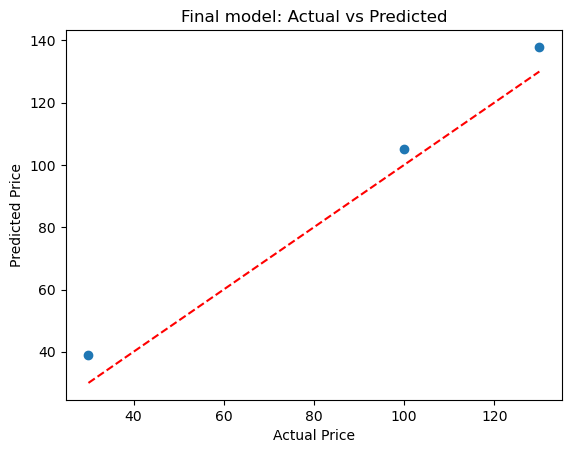

In [44]:


plt.scatter(y_test,y_pred_final)
plt.plot([min(y_test) , max(y_test)],
         [min(y_test) , max(y_test)],
         '--' , color = 'red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Final model: Actual vs Predicted")
plt.show()

In [45]:

os.makedirs("model" , exist_ok = True)

joblib.dump(final_model,"model/final_model.joblib")
joblib.dump(final_scaler,"model/final_scaler.joblib")

['model/final_scaler.joblib']